# Upgrad Credit EDA Assignment

### This assignment aims to extract important details from banking data to help banks make informed decisions and reduce financial risks. The analysis will focus on two sets of data - 'applications data' with current loan applicant information and default status, and 'previous data' with details of past loan applicants.

In [1]:
## Importing all the necessary libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
#Dealing with warning 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the datasets into the system

application_data= pd.read_csv(r'C:\\Users\\Vishal Garg\\Desktop\\EDAproject\\application_data.csv')


## Analysing Data structure
-  Examining initial five rows
-  Verifying data shape
-  Providing data description
-  Validating data types for all columns

In [4]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Analysing the count of rows and columns within the data
application_data.shape

(307511, 122)

In [6]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Dealing with Missing/Null values.
~ Dealing with missing values in data is a crucial step in the data cleaning procedure

In [9]:
#dealing with missing data
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#checking the percentage of missing values greater than 40% in each column creating a variable missing_value
missing_value = application_data.isnull().sum() * 100/len(application_data)
missing_value_percentage =missing_value[missing_value >= 45]
missing_value_percentage

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [11]:
# checking the current lenght
len(missing_value_percentage)

49

In [12]:
###Note :It is evident that most columns have over 45% missing data, and filling in these gaps could distort the data, so the best option is to remove them.

In [13]:
# dropping the major missing values in columns and creating new variable
application_data01 =application_data.drop(columns=missing_value_percentage.index)

In [14]:
# Updated shape of data set
application_data01.shape

(307511, 73)

In [15]:
#length of updated data 
len(application_data01)

307511

In [16]:
application_data01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Checking the data for any remaning missing value
(application_data01.isnull().sum()/len(application_data01))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [18]:
# dealingwith missing value from AMT_ANNUITY column
application_data01.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

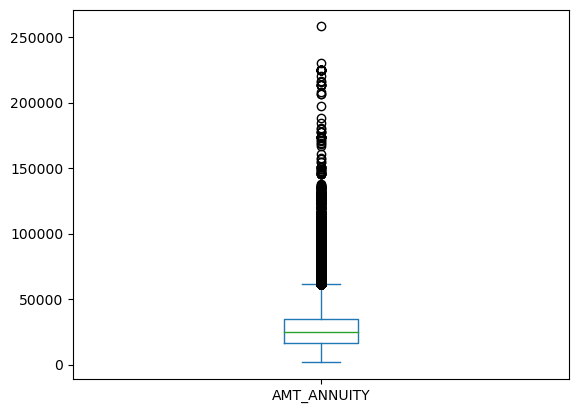

In [19]:
application_data01.AMT_ANNUITY.plot.box()
plt.show()

In [20]:
#Since there are multiple outliers in the column, it is more suitable to impute with the median.
application_data01.AMT_ANNUITY.fillna(application_data01.AMT_ANNUITY.median(), inplace = True)

In [21]:
application_data01.AMT_ANNUITY.isnull().sum()

0

In [22]:
#dealing withmissing values for AMT_GOODS_PRICE column
application_data01.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

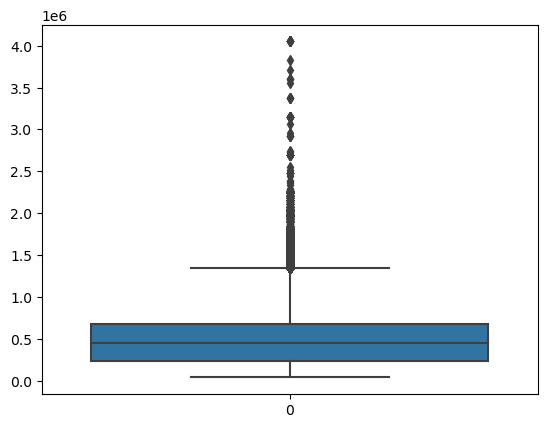

In [23]:
sns.boxplot(application_data01.AMT_GOODS_PRICE)
plt.show()

In [24]:
#Since there are multiple outliers in the column, it is more suitable to impute with the median.
application_data01.AMT_GOODS_PRICE.fillna(application_data01.AMT_GOODS_PRICE.median(),inplace = True)

In [25]:
application_data01.AMT_GOODS_PRICE.isnull().sum()

0

In [26]:
### The column for OCCUPATION_TYPE is missing around 31% of values. 
##Imputing them with the mode is not logical since we cannot predict someone's occupation. 
##Therefore, the best approach is to create a new category called "Unspecified." for the missing data in this column.

In [27]:
application_data01['OCCUPATION_TYPE'].fillna('Unspecified', inplace=True)
print(application_data01['OCCUPATION_TYPE'].unique())

['Laborers' 'Core staff' 'Accountants' 'Managers' 'Unspecified' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [28]:
application_data01.OCCUPATION_TYPE.isnull().sum()


0

In [29]:
# Now checking the NAME_TYPE_SUITE categorical variable and replacing the null value with mode.
application_data01.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [30]:
application_data01.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)

In [31]:
application_data01.NAME_TYPE_SUITE.isnull().sum()

0

In [32]:
## checking the vale which is less then 25% with a new variable missing_vale_less20
Missing_vale_less20 =missing_value[(missing_value <=25) & (missing_value >0)].sort_values(ascending = False)
Missing_vale_less20

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [33]:
#dealing the DAYS_LAST_PHONE_CHANGE
application_data01.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [34]:
application_data01.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [35]:
application_data01.CODE_GENDER.isnull().sum()

0

In [36]:
application_data01.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

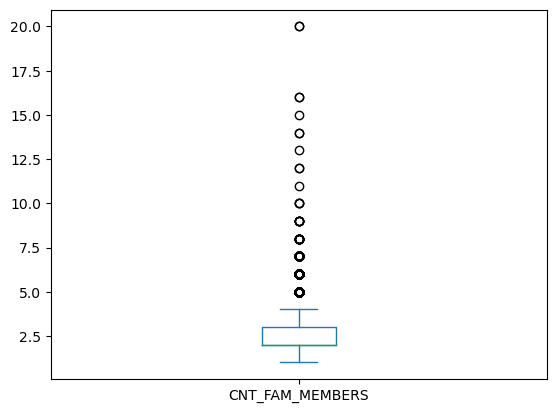

In [37]:
application_data01.CNT_FAM_MEMBERS.plot.box()
plt.show()

In [38]:
#dealing CNT_FAM_MEMBERS with median 
application_data01.CNT_FAM_MEMBERS.fillna(application_data01.CNT_FAM_MEMBERS.median(), inplace = True)


In [39]:
application_data01.CNT_FAM_MEMBERS.isnull().sum()

0

In [40]:
#Now to make analysis more effective we have to drop unnecessary columns
application_data01.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [41]:
excluded_columns = ['REGION_POPULATION_RELATIVE','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [42]:
application_data01.drop(excluded_columns, axis =1, inplace = True)

In [43]:
application_data01.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY'],
      dtype='object')

### Verifying Incorrect Inputs in Columns

In [44]:
application_data01.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [45]:
application_data01.CODE_GENDER.replace('XNA', 'F', inplace=True)

In [46]:
application_data01.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [47]:
application_data01.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [48]:
application_data01.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [49]:
application_data01.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [50]:
application_data01.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [51]:
application_data01.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [52]:
application_data01.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [53]:
application_data01.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [54]:
application_data01.FLAG_MOBIL.value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

In [55]:
application_data01.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [56]:
application_data01.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [57]:
application_data01.ORGANIZATION_TYPE.replace('XNA', 'Unknown', inplace=True)

In [58]:
application_data01.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [59]:
application_data01.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unspecified              96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

### Verifying the data types of numerical columns

In [60]:
application_data01.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGI

In [61]:
#We will transform the DAYS_BIRTH and DAYS_EMPLOYED data columns into years by dividing each value by 365.
application_data01['DAYS_BIRTH'] /= 365
application_data01['DAYS_EMPLOYED'] /= 365

In [62]:
#We should change CNT_FAM_MEMBERS to an integer data type as family members must always be whole numbers.
application_data01['CNT_FAM_MEMBERS'] =application_data01['CNT_FAM_MEMBERS'].astype('int')


In [63]:
application_data01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-25.920548,-1.745205,-3648.0,-2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-45.931507,-3.254795,-1186.0,-291,1,Core staff,2,0,0,0,School,0.622246,NaN,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-52.180822,-0.616438,-4260.0,-2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-52.068493,-8.326027,-9833.0,-2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-54.608219,-8.323288,-4311.0,-3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,-1106.0,0.0


In [64]:
#Converts the designated DataFrame columns to positive values through the use of their absolute values.
colms_to_positive = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
for colms in colms_to_positive:
    application_data01[colms] = abs(application_data01[colms])

In [65]:
application_data01.rename(columns = {'DAYS_BIRTH' : 'CNT_AGE', 'DAYS_EMPLOYED' : 'CNT_YEAR_EMPLOYED'}, inplace = True)


In [66]:
application_data01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,9833.0,2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,4311.0,3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,1106.0,0.0


### Examining for anomalies/outliers

In [67]:
pd.set_option('display.max_columns',None)
application_data01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,9833.0,2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,4311.0,3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,1106.0,0.0


In [68]:
application_data01[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


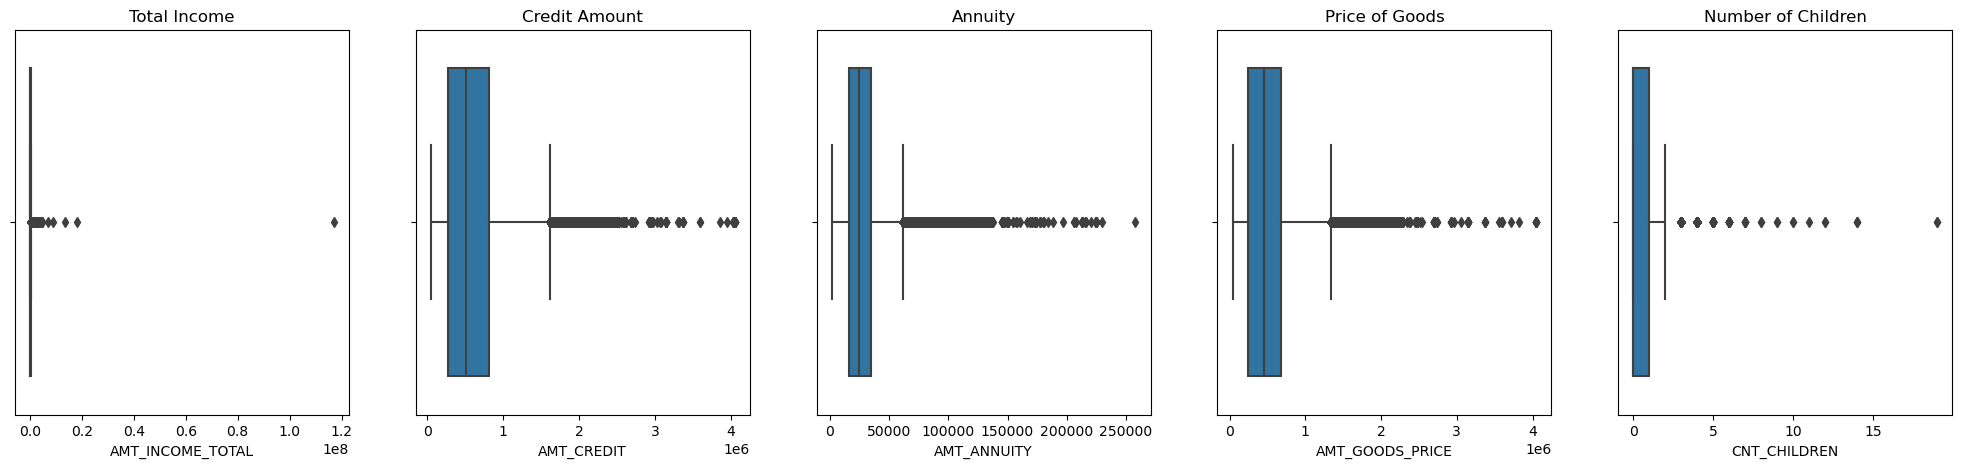

In [69]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
plt.title('Total Income')
sns.boxplot(x=application_data01['AMT_INCOME_TOTAL'])

plt.subplot(1, 5, 2)
plt.title('Credit Amount')
sns.boxplot(x=application_data01['AMT_CREDIT'])

plt.subplot(1, 5, 3)
plt.title('Annuity')
sns.boxplot(x=application_data01['AMT_ANNUITY'])

plt.subplot(1, 5, 4)
plt.title('Price of Goods')
sns.boxplot(x=application_data01['AMT_GOODS_PRICE'])

plt.subplot(1, 5, 5)
plt.title('Number of Children')
sns.boxplot(x=application_data01['CNT_CHILDREN'])


plt.show()

In [70]:
application_data01[['CNT_AGE', 'CNT_YEAR_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']].describe()


,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,2994.202373,4986.120328
std,11.956133,382.037676,1509.450419,3522.886321
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,1720.000000,2010.000000
50%,43.150685,6.079452,3254.000000,4504.000000
75%,53.923288,15.635616,4299.000000,7479.500000
max,69.120548,1000.665753,7197.000000,24672.000000


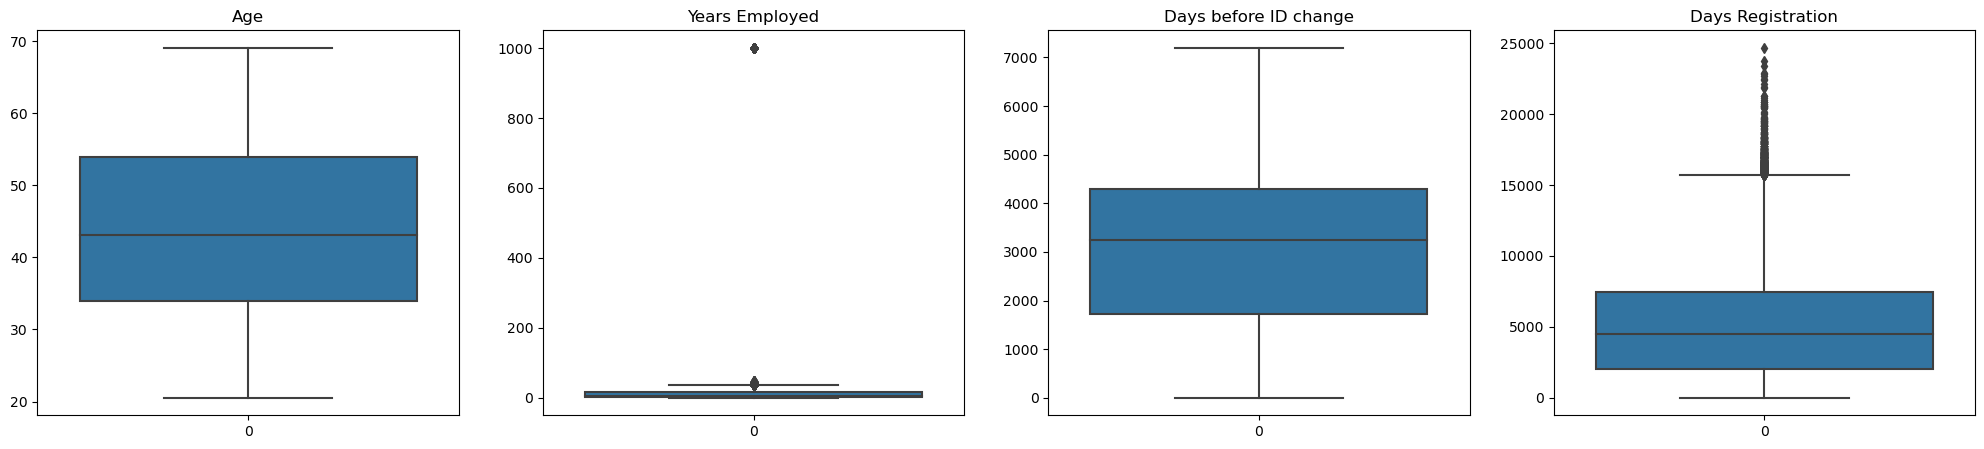

In [71]:
plt.figure(figsize = (25,5))

plt.subplot(1,4,1)
plt.title('Age')
sns.boxplot(application_data01.CNT_AGE)

plt.subplot(1,4,2)
plt.title('Years Employed')
sns.boxplot(application_data01.CNT_YEAR_EMPLOYED)

plt.subplot(1,4,3)
plt.title('Days before ID change')
sns.boxplot(application_data01.DAYS_ID_PUBLISH)

plt.subplot(1,4,4)
plt.title('Days Registration')
sns.boxplot(application_data01.DAYS_REGISTRATION)
plt.show()

In [72]:
application_data01[['CNT_FAM_MEMBERS','CNT_CHILDREN']].describe()

,CNT_FAM_MEMBERS,CNT_CHILDREN
count,307511.000000,307511.000000
mean,2.152664,0.417052
std,0.910679,0.722121
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,20.000000,19.000000


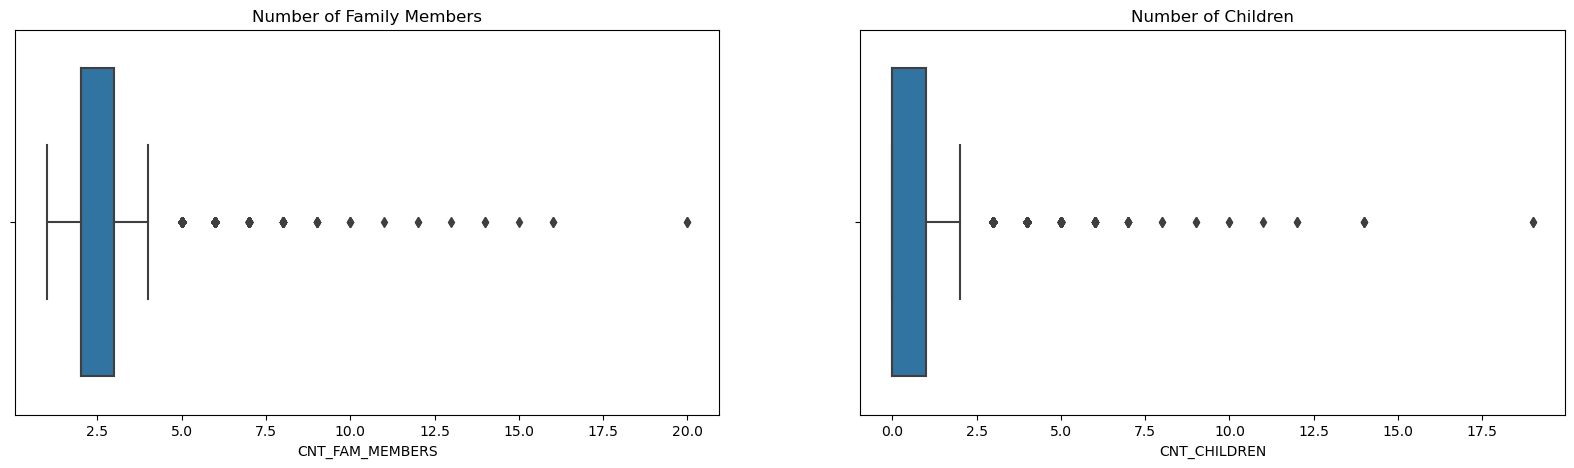

In [73]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Number of Family Members')
sns.boxplot(x=application_data01['CNT_FAM_MEMBERS'])

plt.subplot(1, 2, 2)
plt.title('Number of Children')
sns.boxplot(x=application_data01['CNT_CHILDREN'])

plt.show()

### Dealing with outliers in data analysis
There are multipe ways to deal with outliers

-capping/flooring

-Imputing with mean/median/mode

-Deleting/droping values 

Comparing the interquartile range with the maximum and minimum values determines if imputing should be done through capping or flooring. In this instance, imputations are carried out using capping

In [74]:
#dealing with AMT_GOODS_PRICE column
Q3 = application_data01.AMT_GOODS_PRICE.quantile(0.75)
Q1 = application_data01.AMT_GOODS_PRICE.quantile(0.25)
VAL = Q3-Q1

upper_bound = Q3+1.5*VAL
lower_bound = Q1-1.5*VAL
print(VAL, upper_bound, lower_bound)

441000.0 1341000.0 -423000.0


In [75]:
application_data01.AMT_GOODS_PRICE=np.where(application_data01.AMT_GOODS_PRICE>upper_bound,upper_bound,application_data01.AMT_GOODS_PRICE)

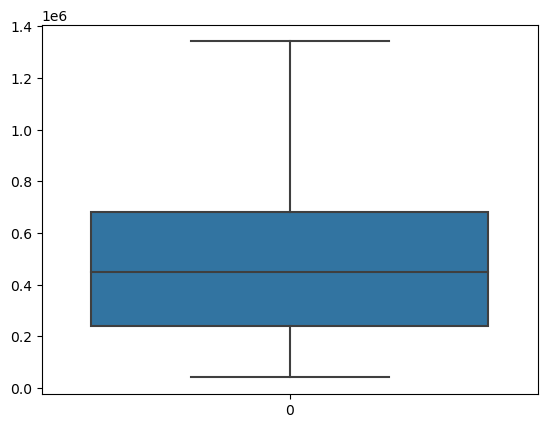

In [76]:
sns.boxplot(application_data01.AMT_GOODS_PRICE)
plt.show()

In [77]:
#Dealing with AMT_ANNUITY column
Q3 = application_data01.AMT_ANNUITY.quantile(0.75)
Q1 = application_data01.AMT_ANNUITY.quantile(0.25)
VAL = Q3-Q1

upper_bound = Q3+1.5*VAL
lower_bound = Q1-1.5*VAL
print(VAL, upper_bound, lower_bound)

18072.0 61704.0 -10584.0


In [78]:
application_data01.AMT_ANNUITY=np.where(application_data01.AMT_ANNUITY> upper_bound, upper_bound,application_data01.AMT_ANNUITY)

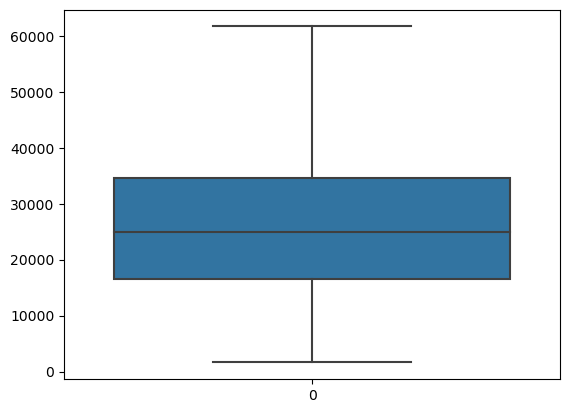

In [79]:
sns.boxplot(application_data01.AMT_ANNUITY)
plt.show()

In [80]:
# Dealing with AMT_CREDIT column
Q3 = application_data01.AMT_CREDIT.quantile(0.75)
Q1 =application_data01.AMT_CREDIT.quantile(0.25)
VAL = Q3-Q1

upper_bound = Q3+1.5*VAL
lower_bound = Q1-1.5*VAL
print(VAL, upper_bound, lower_bound)

538650.0 1616625.0 -537975.0


In [81]:
application_data01.AMT_CREDIT = np.where(application_data01.AMT_CREDIT> upper_bound, upper_bound,application_data01.AMT_CREDIT)

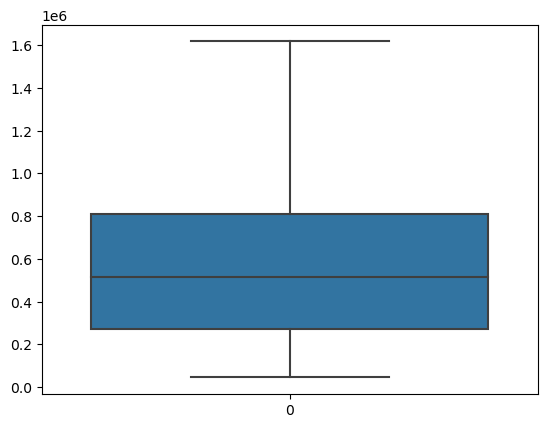

In [82]:
sns.boxplot(application_data01.AMT_CREDIT)
plt.show()

In [83]:
#Dealing with CNT_CHILDREN column
Q3 = application_data01.CNT_CHILDREN.quantile(0.75)
Q1 = application_data01.CNT_CHILDREN.quantile(0.25)
VAL = Q3-Q1

upper_bound = Q3+1.5*VAL
lower_bound = Q1-1.5*VAL
print(VAL, upper_bound, lower_bound)

1.0 2.5 -1.5


In [84]:
application_data01.CNT_CHILDREN = np.where(application_data01.CNT_CHILDREN> upper_bound, upper_bound, application_data01.CNT_CHILDREN)

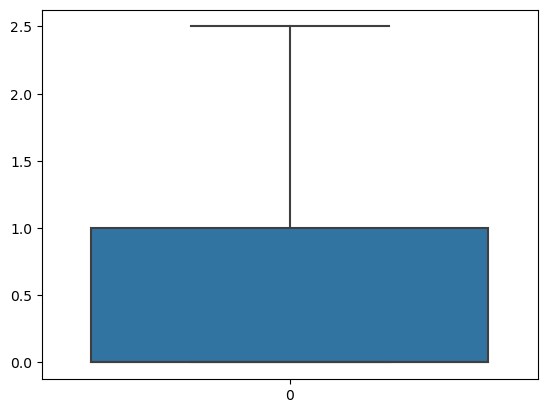

In [85]:
sns.boxplot(application_data01.CNT_CHILDREN)
plt.show()

In [86]:
#treatment for AMT_INCOME_TOTAL column
Q3 = application_data01.AMT_INCOME_TOTAL.quantile(0.75)
Q1 = application_data01.AMT_INCOME_TOTAL.quantile(0.25)
VAL = Q3-Q1

upper_bound = Q3+1.5*VAL
lower_bound = Q1-1.5*VAL
print(VAL, upper_bound, lower_bound)

90000.0 337500.0 -22500.0


In [87]:
application_data01.AMT_INCOME_TOTAL = np.where(application_data01.AMT_INCOME_TOTAL> upper_bound, upper_bound,application_data01.AMT_INCOME_TOTAL)


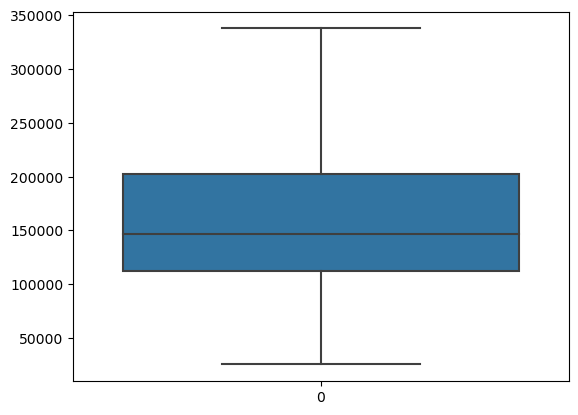

In [88]:
sns.boxplot(application_data01.AMT_INCOME_TOTAL)
plt.show()

-To check the condition of handle outliers, and transform continuous variables into categorical or ordinal variables for analyses we use binning 

### Binning 

In [89]:
#updated head
application_data01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,9833.0,2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,617.0,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,4311.0,3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,1106.0,0.0


In [90]:
#binning of CNT_AGE variable

application_data01['AGE_GROUP'] = pd.cut(application_data01.CNT_AGE, bins = [20,30,40,50,60,70], labels = ['<30', '30-40', '40-50', '50-60', '>60'])

In [91]:
#binning of AMT_INCOME_TOTAL variable
application_data01['INCOME_GROUP'] = pd.cut(application_data01.AMT_INCOME_TOTAL, bins = 5, labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High'])

## Analysis of updated data
-First, we will partition the data into Defaulters and Non-defaulters, then conduct Univariate, Bivariate, and Multi-variate analysis simultaneously.

In [92]:
defaulters = application_data01[application_data01.TARGET == 1]
non_defaulters = application_data01[application_data01.TARGET == 0]

In [93]:
print(defaulters.shape)
print(non_defaulters.shape)

(24825, 33)
(282686, 33)


- Checking imbalance percentage in updated data

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


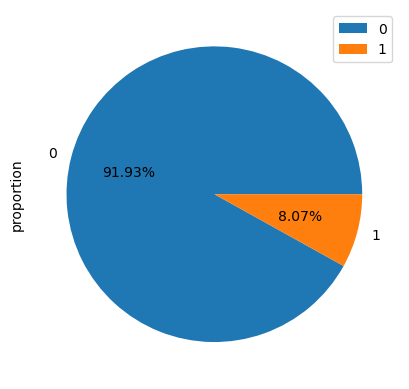

In [94]:
print(application_data01.TARGET.value_counts(normalize = True))
application_data01.TARGET.value_counts(normalize = True).plot.pie(autopct='%.2f%%')
plt.legend()
plt.show()

- Let's review the header of the Defaulters.

In [95]:
defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,<30,Normal
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,6573.0,1827,1,Cooking staff,1,0,0,0,Business Entity Type 3,0.548477,0.190706,161.0,0.0,50-60,Low
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,1182.0,1029,1,Laborers,2,0,0,0,Business Entity Type 3,0.306841,0.320163,1075.0,0.0,40-50,Normal
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,36.668493,9.854795,45.0,4409,1,Sales staff,2,0,0,0,Self-employed,0.674203,0.399676,1480.0,0.0,30-40,Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,67.928767,1000.665753,5391.0,4199,1,Unspecified,2,0,0,0,Unknown,0.023952,0.720944,0.0,0.0,>60,Very Low


- Let's review the header of the Non_Defaulters.

In [96]:
non_defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0,50-60,Very Low
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,9833.0,2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,617.0,NaN,50-60,Low
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,4311.0,3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,1106.0,0.0,50-60,Low
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,46.413699,4.350685,4970.0,477,1,Laborers,2,0,0,0,Other,0.354225,0.621226,2536.0,0.0,40-50,Low


### Performing Univariate Analysis

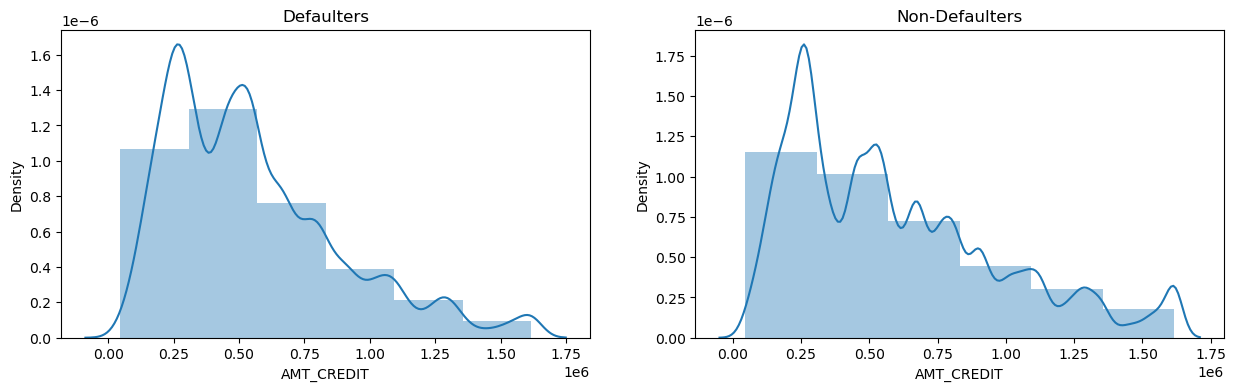

In [97]:
#AMT_CREDIT vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.distplot(defaulters.AMT_CREDIT, bins = 6)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.distplot(non_defaulters.AMT_CREDIT, bins = 6)
plt.title('Non-Defaulters')

plt.show()

-- In non-defaulters, a majority of individuals borrow around 3 lakhs, with fewer people taking larger loans as the amount increases. Defaulters, on the other hand, tend to have taken a 5 lakh loan.

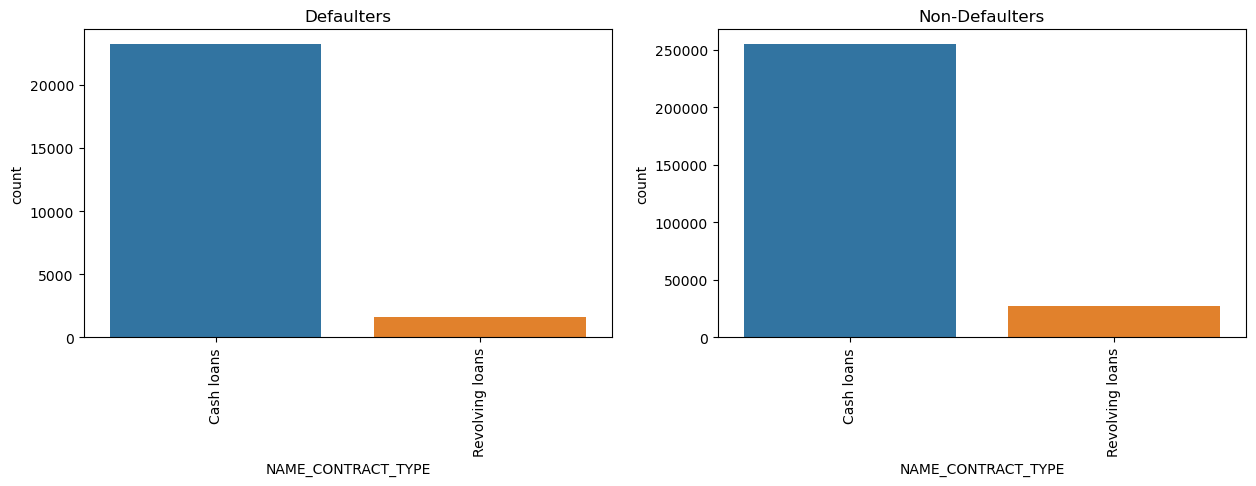

In [98]:
#NAME_CONTRACT_TYPE vs TARGET
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='NAME_CONTRACT_TYPE', data=defaulters)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x='NAME_CONTRACT_TYPE', data=non_defaulters)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)

plt.show()

- The majority of defaulters and non-defaulters have obtained cash loans, while only a small number have taken revolving loans.

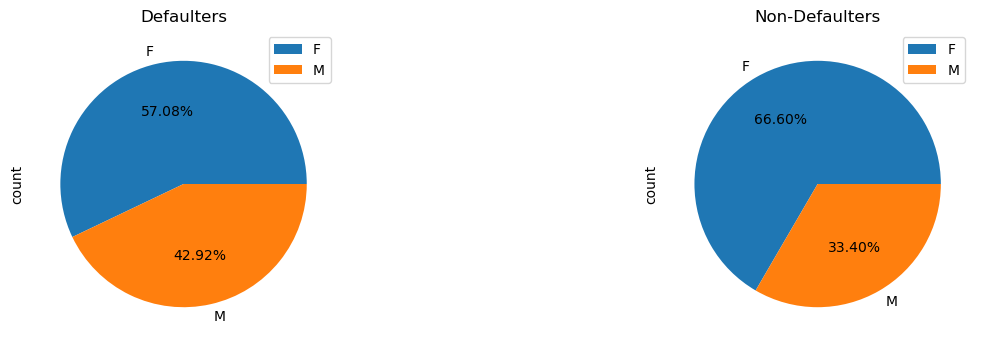

In [99]:
#CODE_GENDER vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
defaulters.CODE_GENDER.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.title('Defaulters')
plt.legend()

plt.subplot(1,2,2)
non_defaulters.CODE_GENDER.value_counts().plot(kind= 'pie', autopct = '%.2f%%')
plt.title('Non-Defaulters')
plt.legend()



plt.show()

- The number of females is highest among both those who have defaulted and those who have not defaulted.

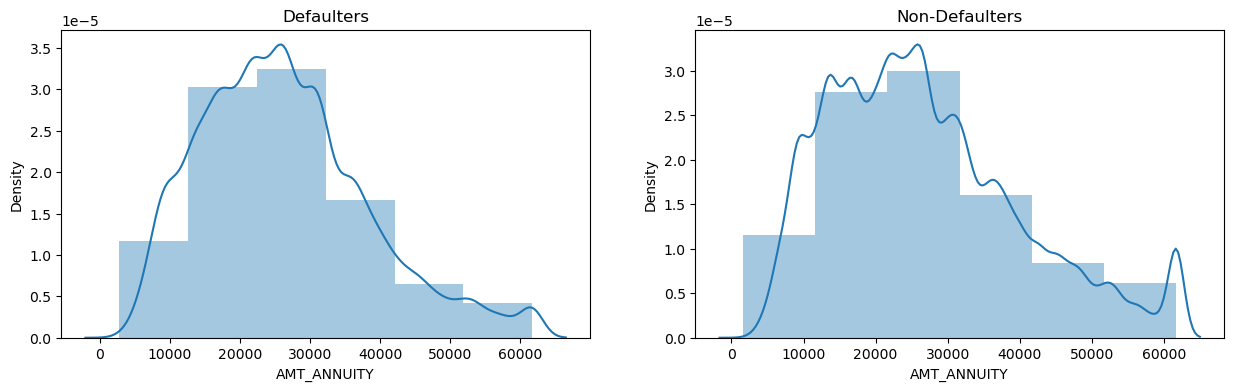

In [100]:
#AMT_ANNUITY vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.distplot(defaulters.AMT_ANNUITY, bins = 6)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.distplot(non_defaulters.AMT_ANNUITY, bins = 6)
plt.title('Non-Defaulters')

plt.show()

- A nearly identical pattern can be observed in both situations.

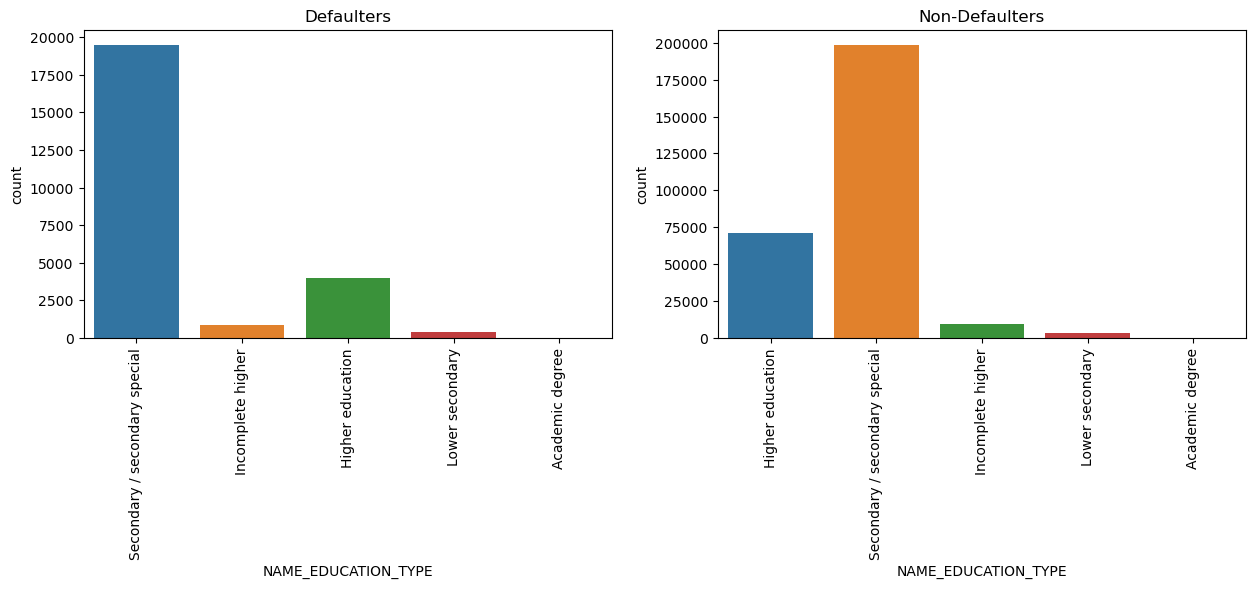

In [101]:
#NAME_EDUCATION_TYPE vs TARGET
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='NAME_EDUCATION_TYPE', data=defaulters)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x='NAME_EDUCATION_TYPE', data=non_defaulters)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)

plt.show()

- Individuals with secondary/secondary special education make up the largest portion of both defaulters and non-defaulters, with those holding higher education coming next in line.

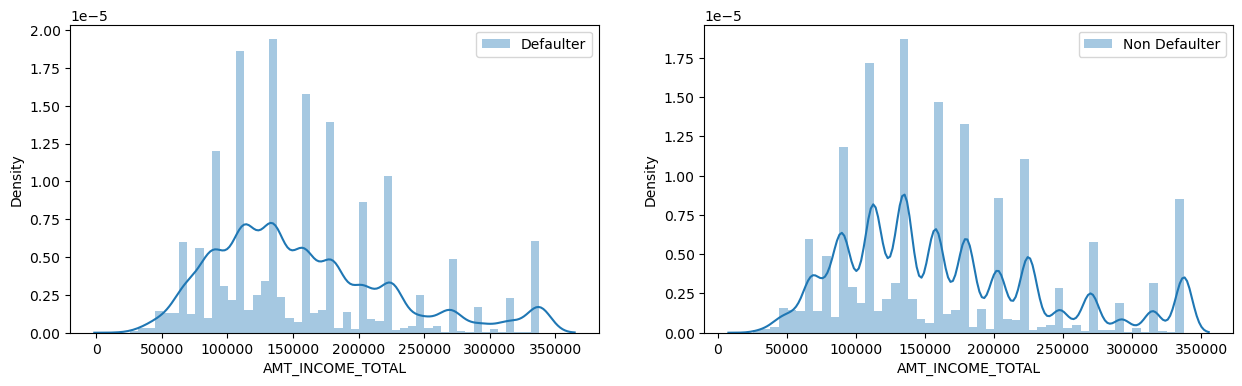

In [102]:
#AMT_INCOME_TOTAL vs TARGET
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(defaulters.AMT_INCOME_TOTAL,label='Defaulter')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(non_defaulters.AMT_INCOME_TOTAL,label='Non Defaulter')

plt.legend()
plt.show()

- A regular pattern of high and low behavior is observed in individuals who do not default.

- 
Defaulters with incomes between 1L-1.5L outnumber those with incomes exceeding 2.5L, indicating that lower income individuals are more likely to default compared to higher income individuals.

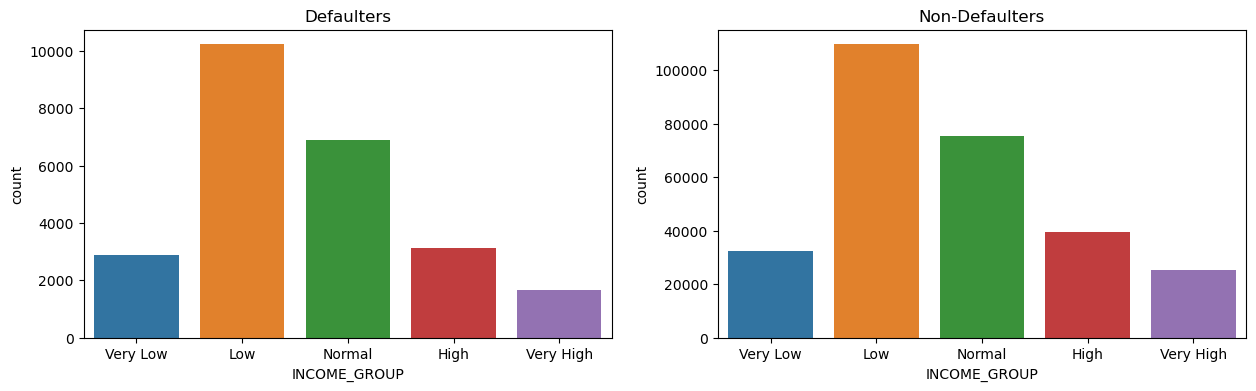

In [103]:
#INCOME_GROUP vs TARGET
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='INCOME_GROUP', data=defaulters, order=['Very Low', 'Low', 'Normal', 'High', 'Very High'])
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.countplot(x='INCOME_GROUP', data=non_defaulters, order=['Very Low', 'Low', 'Normal', 'High', 'Very High'])
plt.title('Non-Defaulters')

plt.show()

- The above graphs indicate that individuals with lower incomes have the highest numbers of defaulters and non-defaulters.

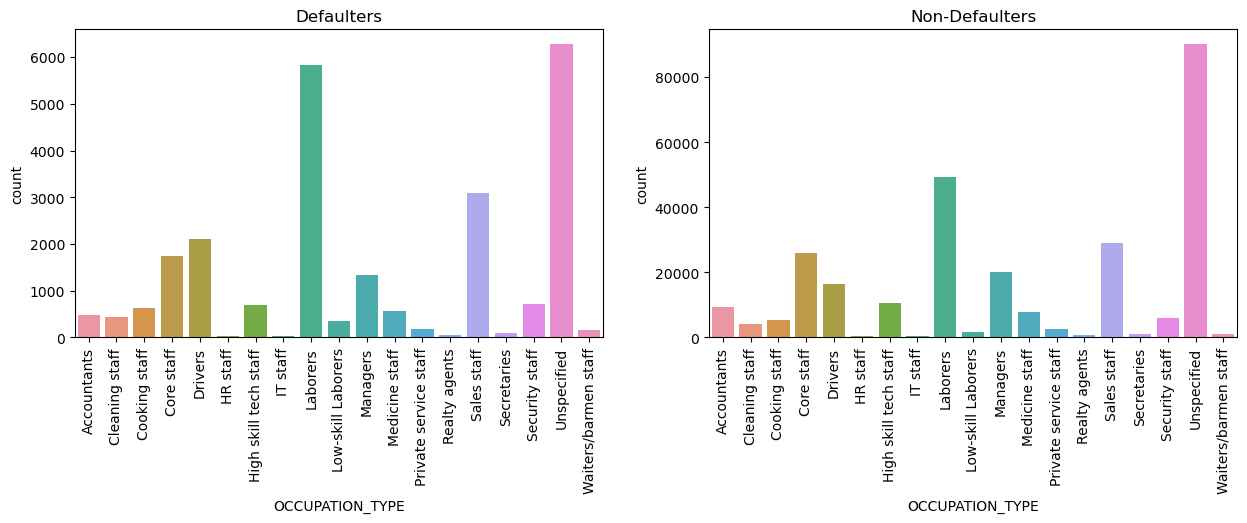

In [104]:
# Convert OCCUPATION_TYPE to categorical data type
defaulters['OCCUPATION_TYPE'] = defaulters['OCCUPATION_TYPE'].astype('category')
non_defaulters['OCCUPATION_TYPE'] = non_defaulters['OCCUPATION_TYPE'].astype('category')

# OCCUPATION_TYPE vs TARGET
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=defaulters, x='OCCUPATION_TYPE')
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=non_defaulters, x='OCCUPATION_TYPE')
plt.title('Non-Defaulters')
plt.xticks(rotation=90)

plt.show()

- Labourers appear to be at the highest level in both defaulters and non-defaulters.

### Bivariate Analysis

- Now as per the project requiremnet we have to find out the 10 highest correlated variables

In [105]:
num_col0=non_defaulters.select_dtypes('number')
corr_mat0=num_col0.corr(method='pearson')
corr_mat0=corr_mat0.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat0.head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.985582
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.870962
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
AMT_ANNUITY                  AMT_GOODS_PRICE               0.797315
                             AMT_CREDIT                    0.794808
CNT_YEAR_EMPLOYED            CNT_AGE                       0.626114
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.492921
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.446101
AMT_INCOME_TOTAL             AMT_GOODS_PRICE               0.417592
AMT_CREDIT                   AMT_INCOME_TOTAL              0.414309
dtype: float64

In [106]:
num_col1=defaulters.select_dtypes('number')
corr_mat1=num_col1.corr(method='pearson')
corr_mat1=corr_mat1.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat1.head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.981837
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.875289
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
AMT_GOODS_PRICE              AMT_ANNUITY                   0.760287
AMT_ANNUITY                  AMT_CREDIT                    0.760123
CNT_AGE                      CNT_YEAR_EMPLOYED             0.582185
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION    0.497937
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.436918
AMT_GOODS_PRICE              AMT_INCOME_TOTAL              0.357696
AMT_INCOME_TOTAL             AMT_CREDIT                    0.356199
dtype: float64

Correlation for defaulters is  0.7601234136216841
Correlation for non-defaulters is  0.7948078743243031


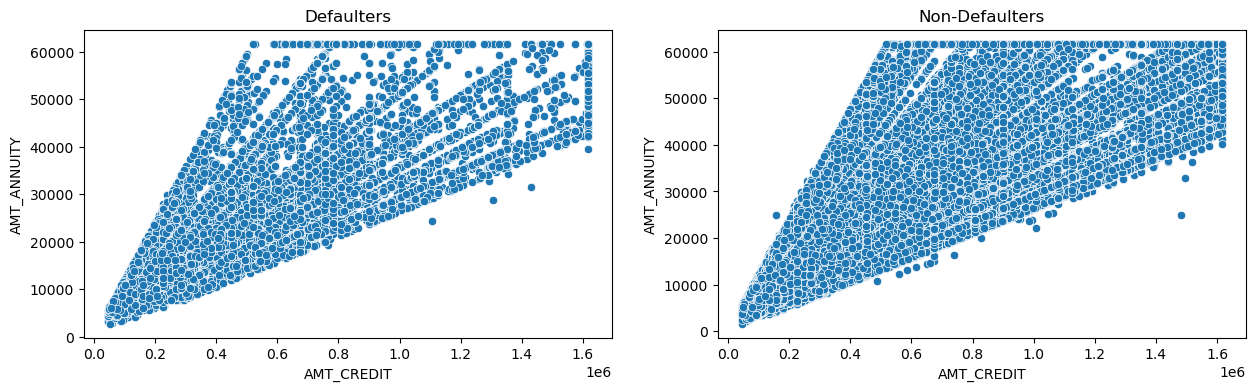

In [107]:
#AMT_CREDIT vs AMT_ANNUITY
# Calculate correlation
defaulters_corr = defaulters[['AMT_CREDIT', 'AMT_ANNUITY']].corr().iloc[0, 1]
non_defaulters_corr = non_defaulters[['AMT_CREDIT', 'AMT_ANNUITY']].corr().iloc[0, 1]

print('Correlation for defaulters is ', defaulters_corr)
print('Correlation for non-defaulters is ', non_defaulters_corr)

# Plot scatterplot
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=defaulters)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=non_defaulters)
plt.title('Non-Defaulters')

plt.show()

- A standard relationship appears to exist between the annuity amount and credit amount.

Correlation for defaulters is  0.3561987735896068
Correlation for non-defaulters is  0.4143085292496485


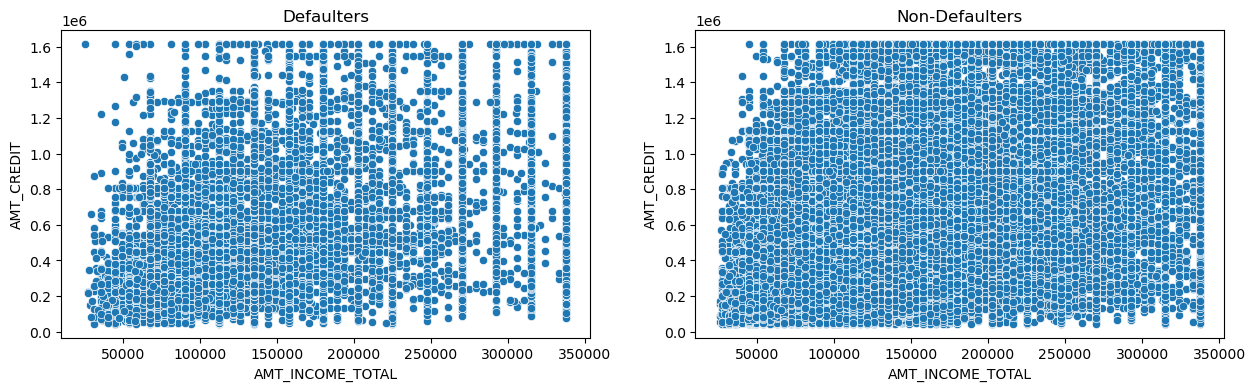

In [108]:
#AMT_CREDIT vs AMT_INCOME_TOTAL
# Calculate correlation
defaulters_corr = defaulters[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr().iloc[0, 1]
non_defaulters_corr = non_defaulters[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr().iloc[0, 1]

print('Correlation for defaulters is ', defaulters_corr)
print('Correlation for non-defaulters is ', non_defaulters_corr)

# Plot scatterplot
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=defaulters)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=non_defaulters)
plt.title('Non-Defaulters')

plt.show()

- The relationship between client income and loan amount does not show a strong correlation for defaulters and non-defaulters. While higher income individuals are expected to take larger loans and repay them easily, those with lower income also take large loans for luxurious needs. This can be observed in the defaulters graph where points are not closely packed as loan and credit amounts increase.


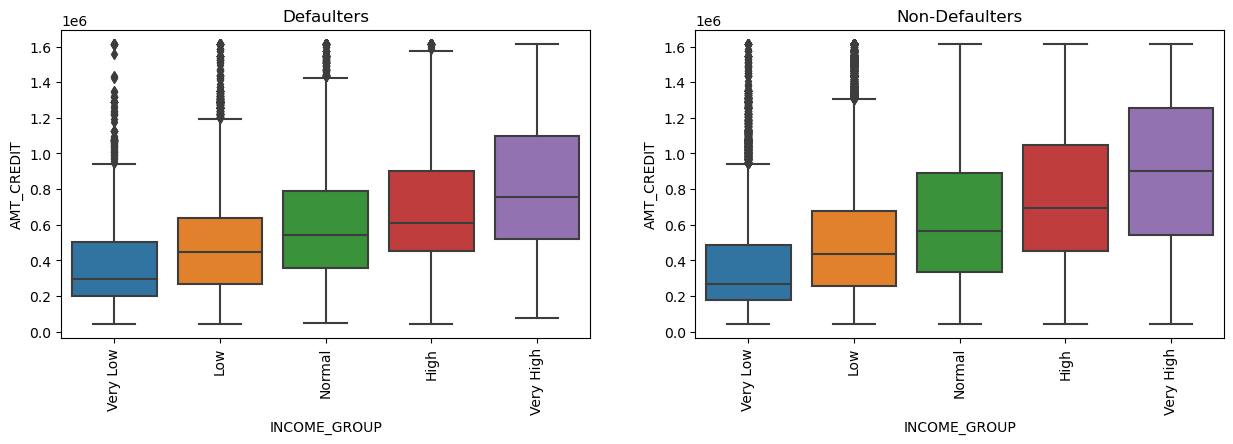

In [109]:
#AMT_CREDIT vs INCOME_GROUP
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=defaulters.INCOME_GROUP, y=defaulters.AMT_CREDIT)
plt.xticks(rotation=90)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(x=non_defaulters.INCOME_GROUP, y=non_defaulters.AMT_CREDIT)
plt.xticks(rotation=90)
plt.title('Non-Defaulters')

plt.show()

- There is a typical pattern where, as income rises, the median loan amount also increases.

- Both graphs show a similar pattern. Rich defaulters typically borrow a median loan amount of 7L, while non-defaulters in the same income bracket borrow around 10L. This indicates that the bank trusts non-defaulters more and is more willing to extend credit to them.

Correlation for defaulters is  0.9818366038380505
Correlation for non-defaulters is  0.9855821500980386


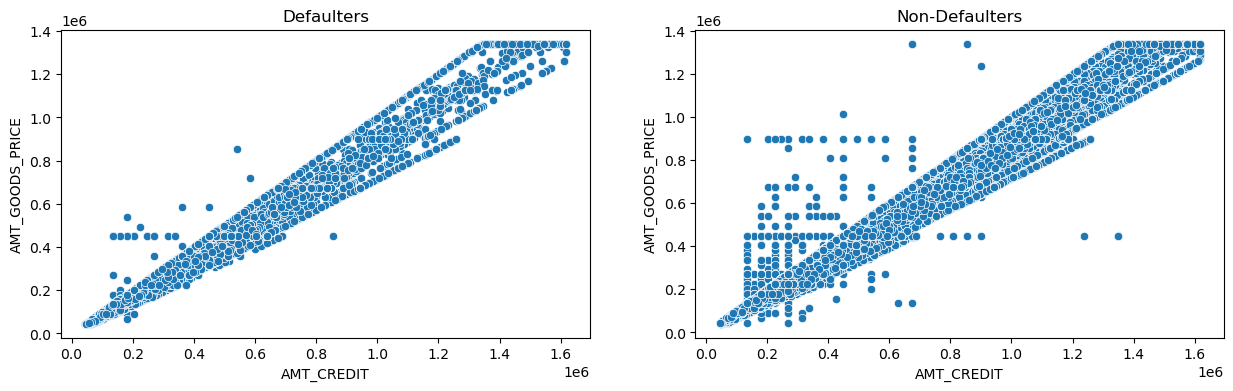

In [110]:
# AMT_CREDIT vs AMT_GOODS_PRICE
print('Correlation for defaulters is ', defaulters.AMT_CREDIT.corr(defaulters.AMT_GOODS_PRICE))
print('Correlation for non-defaulters is ', non_defaulters.AMT_CREDIT.corr(non_defaulters.AMT_GOODS_PRICE))

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=defaulters.AMT_CREDIT, y=defaulters.AMT_GOODS_PRICE)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.scatterplot(x=non_defaulters.AMT_CREDIT, y=non_defaulters.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')

plt.show()

- The data clearly shows a strong correlation between credit amount and price of goods for defaulters and non-defaulters, as evidenced by a correlation coefficient of 0.98. This suggests that higher prices of goods result in larger loan amounts.

Correlation =  0.7602866472620412


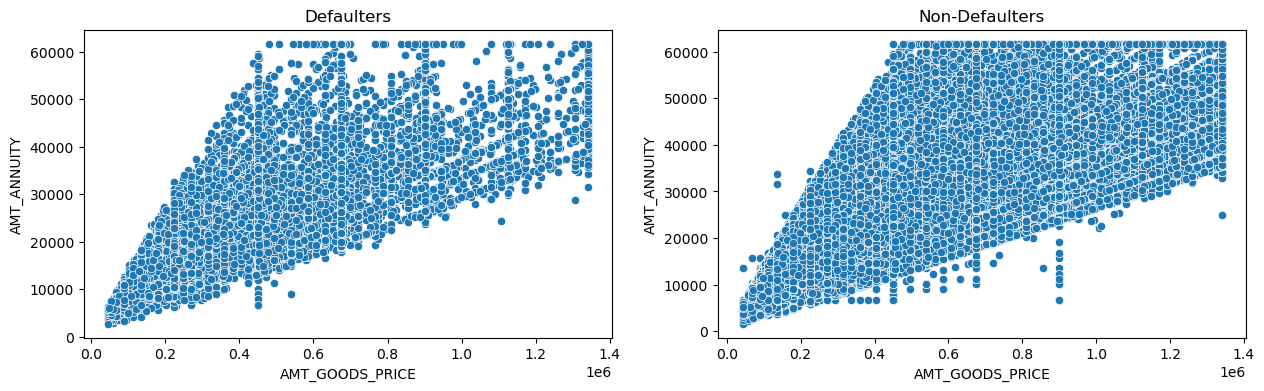

In [111]:
# AMT_GOODS_PRICE vs AMT_ANNUITY
print('Correlation = ', defaulters.AMT_GOODS_PRICE.corr(defaulters.AMT_ANNUITY))

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=defaulters.AMT_GOODS_PRICE, y=defaulters.AMT_ANNUITY)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.scatterplot(x=non_defaulters.AMT_GOODS_PRICE, y=non_defaulters.AMT_ANNUITY)
plt.title('Non-Defaulters')

plt.show()

- There appears to be a typical connection between the cost of items and the level of annuity, although the relationship between them is not certain.

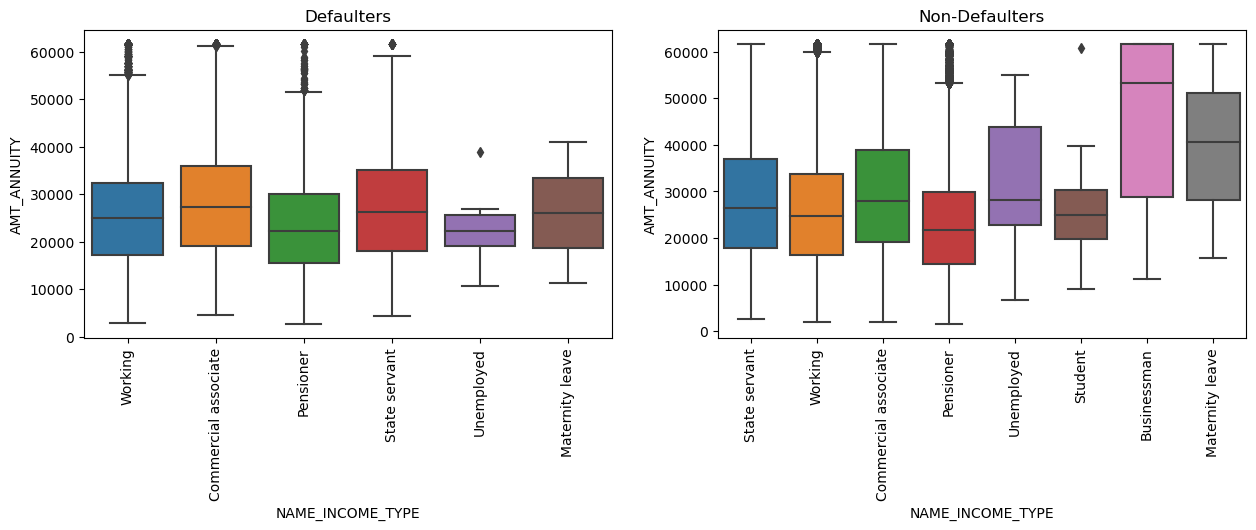

In [112]:
# AMT_ANNUITY vs NAME_INCOME_TYPE
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=defaulters.NAME_INCOME_TYPE, y=defaulters.AMT_ANNUITY)
plt.xticks(rotation=90)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(x=non_defaulters.NAME_INCOME_TYPE, y=non_defaulters.AMT_ANNUITY)
plt.xticks(rotation=90)
plt.title('Non-Defaulters')

plt.show()

- Among those who did not default on their payments, business owners receive the highest median annuity sum, with individuals on maternity leave coming in second.

- In defaulters, everyone has a median annuity between 20,000 - 30,000, with no businessmen or students falling in this range.

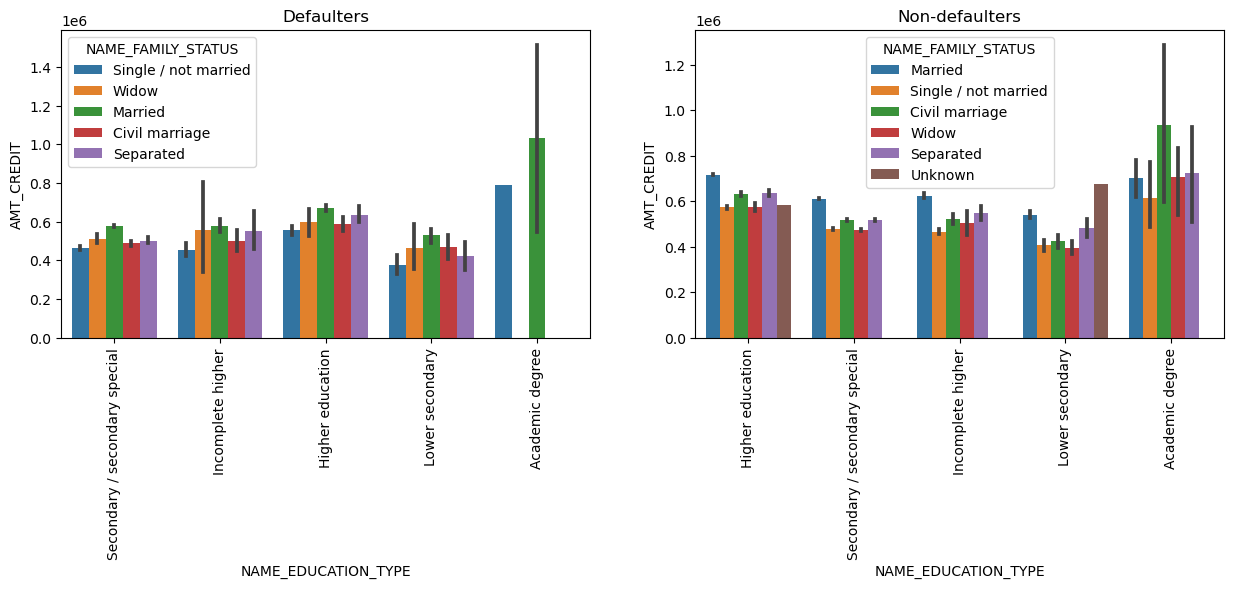

In [113]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=defaulters.NAME_EDUCATION_TYPE, y=defaulters.AMT_CREDIT, hue=defaulters.NAME_FAMILY_STATUS)
plt.xticks(rotation=90)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.barplot(x=non_defaulters.NAME_EDUCATION_TYPE, y=non_defaulters.AMT_CREDIT, hue=non_defaulters.NAME_FAMILY_STATUS)
plt.xticks(rotation=90)
plt.title('Non-defaulters')

plt.show()

- Defaulteras include all married individuals with an academic degree who have not repaid their loans. Non-defaulters, except those with academic degrees, have taken the highest amount of credit.


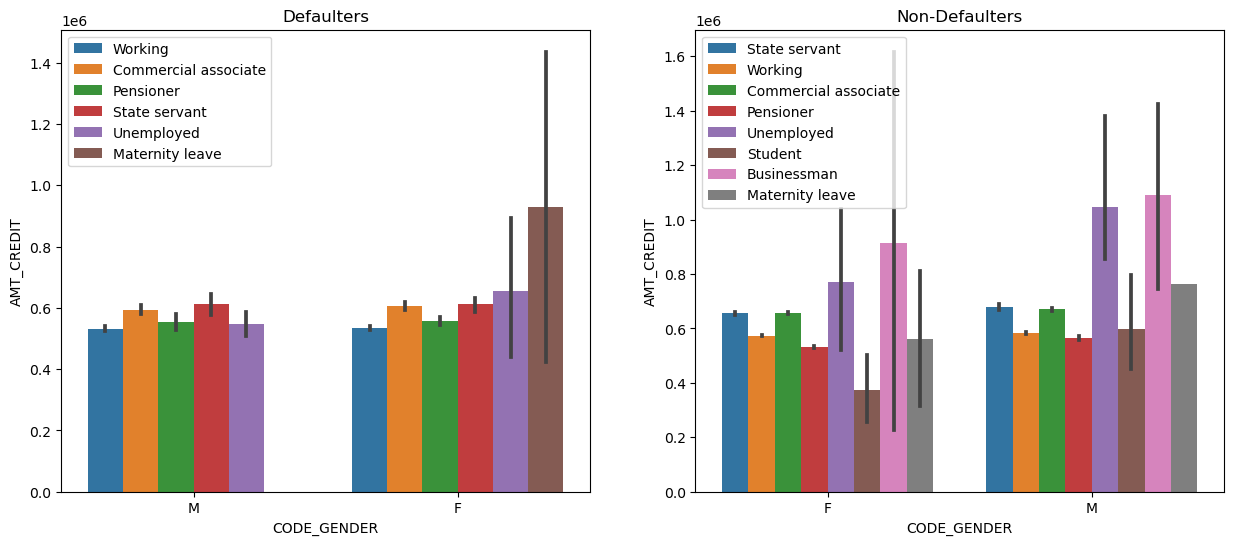

In [114]:
# CODE_GENDER vs AMT_CREDIT vs NAME_INCOME_TYPE
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Defaulters')
sns.barplot(x=defaulters.CODE_GENDER, y=defaulters.AMT_CREDIT, hue=defaulters.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.title('Non-Defaulters')
sns.barplot(x=non_defaulters.CODE_GENDER, y=non_defaulters.AMT_CREDIT, hue=non_defaulters.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.show()

- Pregnant women tend to borrow more and struggle to pay back, while those who borrow less repay successfully. No students or businessmen have failed to repay loans. Surprisingly, unemployed men and women have successfully repaid loans, even after borrowing large amounts.

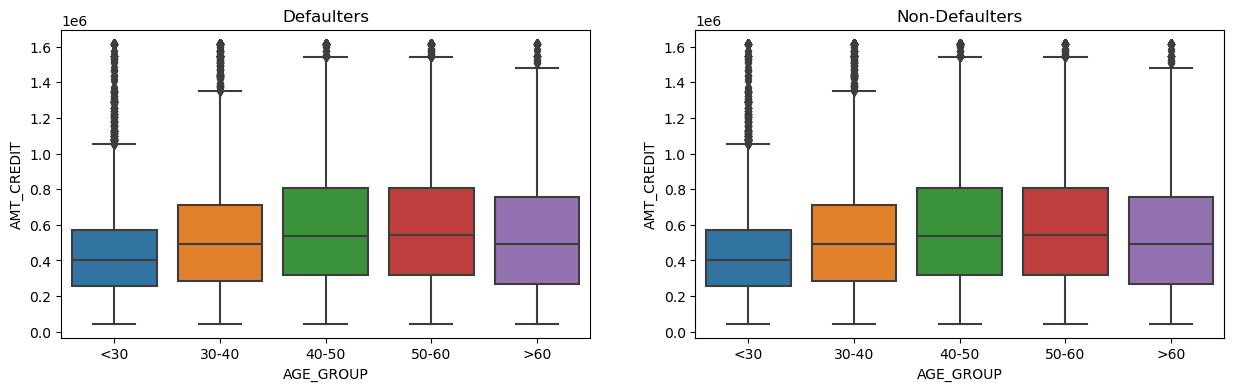

In [115]:
# AGE_GROUP vs AMT_CREDIT
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=defaulters.AGE_GROUP, y=defaulters.AMT_CREDIT)
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(x=defaulters.AGE_GROUP, y=defaulters.AMT_CREDIT)
plt.title('Non-Defaulters')

plt.show()

- The age group with the highest credit utilization is 40-50, followed by 50-60. Defaulters under 30 have low credit amounts and struggle with loan repayment, possibly due to unstable employment.

### Multivariate analysis
- Next, we will move forward with the final analysis, Multivariate analysis, in order to achieve the highest possible output.

In [116]:
defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,<30,Normal
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,6573.0,1827,1,Cooking staff,1,0,0,0,Business Entity Type 3,0.548477,0.190706,161.0,0.0,50-60,Low
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,1182.0,1029,1,Laborers,2,0,0,0,Business Entity Type 3,0.306841,0.320163,1075.0,0.0,40-50,Normal
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,36.668493,9.854795,45.0,4409,1,Sales staff,2,0,0,0,Self-employed,0.674203,0.399676,1480.0,0.0,30-40,Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,67.928767,1000.665753,5391.0,4199,1,Unspecified,2,0,0,0,Unknown,0.023952,0.720944,0.0,0.0,>60,Very Low


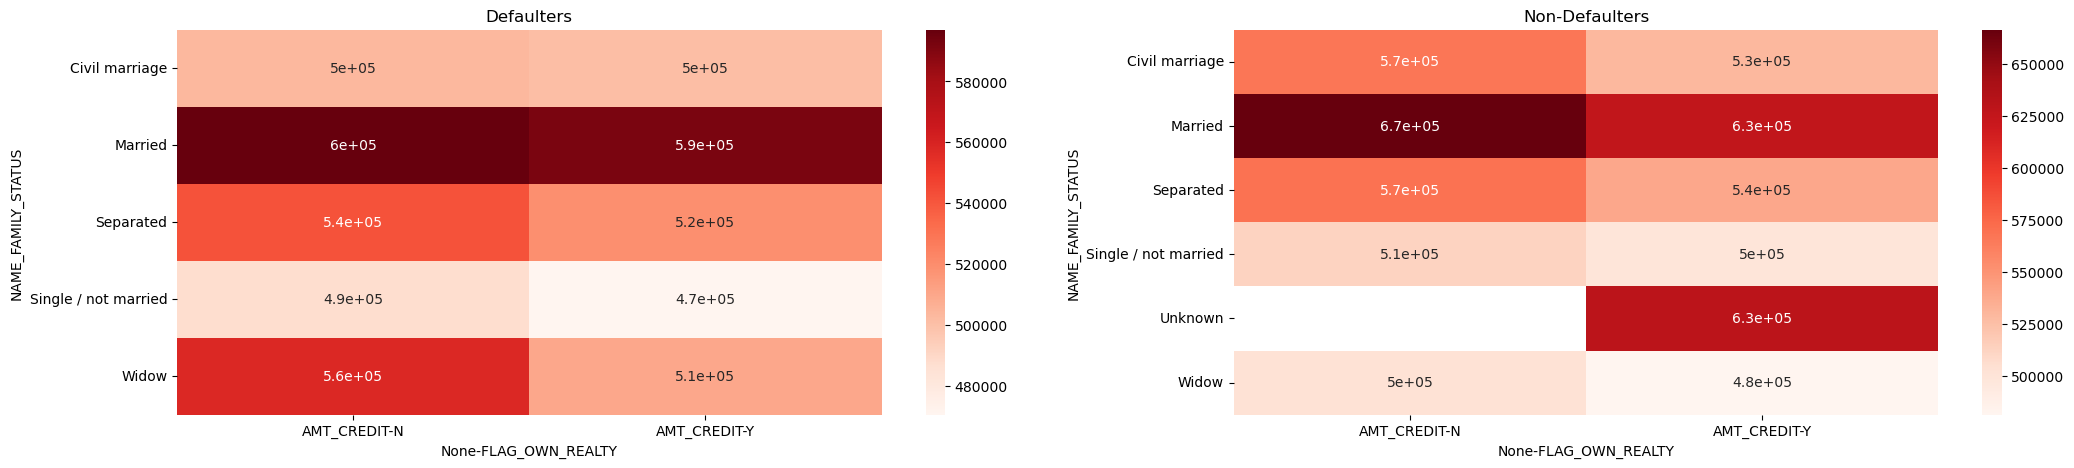

In [117]:
#NAME_FAMILY_STATUS vs FLAG_OWN_REALTY vs AMT_CREDIT

p1 = pd.pivot_table(defaulters, index=['NAME_FAMILY_STATUS'], columns=['FLAG_OWN_REALTY'], values=['AMT_CREDIT'])
p0 = pd.pivot_table(non_defaulters, index=['NAME_FAMILY_STATUS'], columns=['FLAG_OWN_REALTY'], values=['AMT_CREDIT'])

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
sns.heatmap(p1, annot=True, cmap='Reds')
plt.title('Defaulters')

plt.subplot(1, 2, 2)
sns.heatmap(p0, annot=True, cmap='Reds')
plt.title('Non-Defaulters')

plt.show()

- Widows without property have taken large loans and struggle to pay them back, although some have successfully repaid.

- Married individuals without property often take out substantial loans

- Individuals in civil marriages who default on loans have similar credit amounts to those who do not default, but they still struggle to repay.

### Evaluation of prior information
- Reviewing the initial five entries
- Assessing data dimensions
- Providing an overview of the data
- Verifying the data types for each column.

In [118]:
previous_application= pd.read_csv(r'C:\\Users\\Vishal Garg\\Desktop\\EDAproject\\previous_application.csv')

In [119]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#checking the number of rows and columns in the data 
previous_application.shape

(1670214, 37)

In [121]:
pd.set_option('display.max_rows', None)
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [122]:
#Analyze and report the percentiles, minimum, and maximum values of the file.
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Dealing with absent/missing data 
- Dealing with missing values in data is a crucial part of the data cleaning process.


In [123]:
#dealing with missing data
check_missing  = (previous_application.isnull().sum() /len(previous_application))*100
print(check_missing)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [124]:
### Dropping missing columns
drop_columns = check_missing[check_missing>45].index.to_list()


In [125]:
previous_application.drop(drop_columns, axis  = 1, inplace=True)


In [126]:
previous_application.shape

(1670214, 32)

In [127]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_D

In [128]:
# Dealing with the AMT_CREDIT with median
previous_application.AMT_CREDIT.fillna(previous_application.AMT_CREDIT.median(), inplace = True)


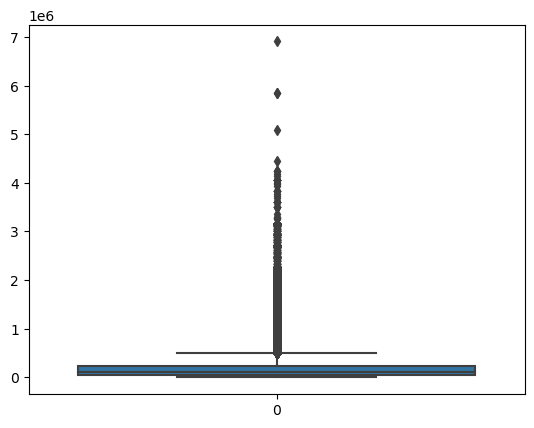

In [129]:
#dealing with the AMT_GOODS_PRICE.
sns.boxplot(previous_application.AMT_GOODS_PRICE)
plt.show()

In [130]:
#Due to the presence of numerous outliers, imputing (if consider) with the median is the most effective method.
previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.median(), inplace = True)


In [131]:
previous_application.AMT_GOODS_PRICE.isnull().sum()


0

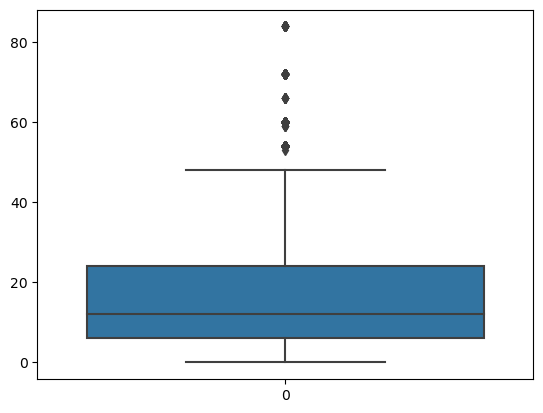

In [132]:
#Dealing with CNT_PAYMENT
sns.boxplot(previous_application.CNT_PAYMENT)
plt.show()

In [133]:
#Because there are outliers in the column, employing the median for imputing is the best method.
previous_application.CNT_PAYMENT.fillna(previous_application.CNT_PAYMENT.median(), inplace = True)


In [134]:
previous_application.CNT_PAYMENT.isnull().sum()

0

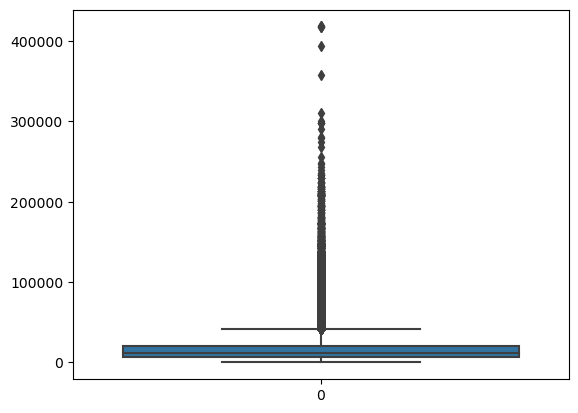

In [135]:
#Dealing with AMT_ANNUITY
sns.boxplot(previous_application.AMT_ANNUITY)
plt.show()

In [136]:
#Utilizing the median is the most efficient approach for filling in values within the column because it includes outliers.
previous_application.AMT_ANNUITY.fillna(previous_application.AMT_ANNUITY.median(), inplace = True)


In [137]:
previous_application.AMT_ANNUITY.isnull().sum()

0

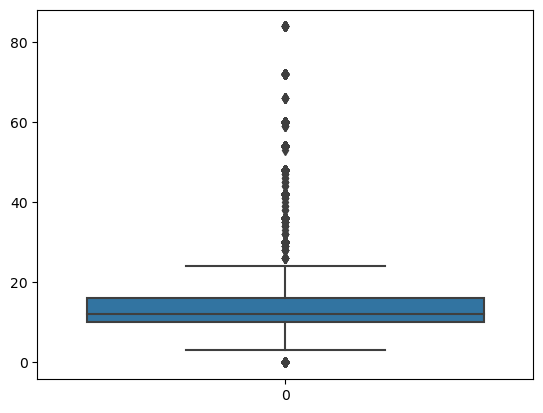

In [138]:
#dealing with the values of CNT_PAYMENT
sns.boxplot(previous_application.CNT_PAYMENT)
plt.show()

In [139]:
#Using the median is the most effective method ,if replacing values in the column as it takes into account outliers.
previous_application.CNT_PAYMENT.fillna(previous_application.CNT_PAYMENT.median(), inplace = True)


In [140]:
previous_application.CNT_PAYMENT.isnull().sum()


0

In [141]:
#PRODUCT_COMBINATION
previous_application.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [142]:
#The most effective way to handle missing values in the PRODUCT_COMBINATION column is by assigning them to a new category labeled as 'Unknown'.
previous_application.PRODUCT_COMBINATION.fillna('Unknown', inplace = True)


### Verifying the data type of each value in every column

In [143]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [144]:
previous_application.DAYS_FIRST_DUE.describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [145]:
#Turn negative days into positive by converting them.
previous_application.DAYS_FIRST_DUE = previous_application.DAYS_FIRST_DUE.apply(lambda x: abs(x))


In [146]:
previous_application.DAYS_LAST_DUE_1ST_VERSION.head()


0    300.0
1    916.0
2     59.0
3   -152.0
4      NaN
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [147]:
#as we can see days are in negative, converting them into positive will be needed
previous_application.DAYS_LAST_DUE_1ST_VERSION = previous_application.DAYS_LAST_DUE_1ST_VERSION.apply(lambda x: abs(x))

In [148]:
previous_application.DAYS_FIRST_DRAWING.describe()


count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [149]:
#Convert negative days into positive values.
previous_application.DAYS_FIRST_DRAWING = previous_application.DAYS_FIRST_DRAWING.apply(lambda x: abs(x))


In [150]:
previous_application.DAYS_LAST_DUE.head()


0       -42.0
1    365243.0
2    365243.0
3      -182.0
4         NaN
Name: DAYS_LAST_DUE, dtype: float64

In [151]:
#converting days from negative them to positive
previous_application.DAYS_LAST_DUE = previous_application.DAYS_LAST_DUE.apply(lambda x: abs(x))


In [152]:
previous_application.DAYS_DECISION.describe()


count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [153]:
#converting from negative to possitive
previous_application.DAYS_DECISION = previous_application.DAYS_DECISION.apply(lambda x: abs(x))


In [154]:
previous_application.DAYS_TERMINATION.describe()


count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [155]:
#Changing the negative days into positive days.
previous_application.DAYS_TERMINATION = previous_application.DAYS_TERMINATION.apply(lambda x: abs(x))


### Verifying the presence of anomalies/outliers

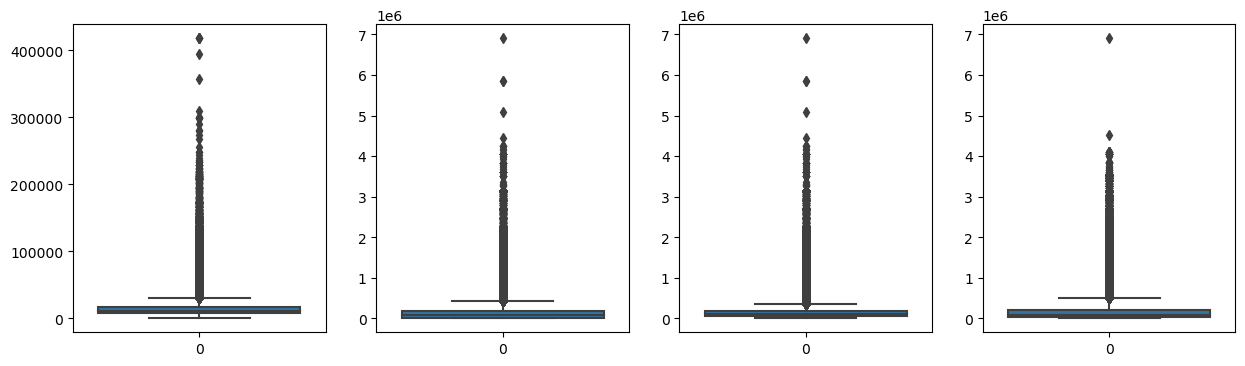

In [156]:
plt.figure(figsize = (15,4))

plt.subplot(1,4,1)
sns.boxplot(previous_application.AMT_ANNUITY)

plt.subplot(1,4,2)
sns.boxplot(previous_application.AMT_APPLICATION)

plt.subplot(1,4,3)
sns.boxplot(previous_application.AMT_GOODS_PRICE)

plt.subplot(1,4,4)
sns.boxplot(previous_application.AMT_CREDIT)
plt.show()

- Capping anomalies/outLiers

In [157]:
#AMT_GOODS_PRICE
Q3=previous_application.AMT_GOODS_PRICE.quantile(0.75)
Q1=previous_application.AMT_GOODS_PRICE.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

112905.0 349762.5 -101857.5


In [158]:
previous_application.AMT_GOODS_PRICE=np.where(previous_application.AMT_GOODS_PRICE>upper_bound,upper_bound,previous_application.AMT_GOODS_PRICE)


In [159]:
#AMT_ANNUITY
Q3=previous_application.AMT_ANNUITY.quantile(0.75)
Q1=previous_application.AMT_ANNUITY.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

9276.930000000002 30739.421250000007 -6368.298750000004


In [160]:
previous_application.AMT_ANNUITY=np.where(previous_application.AMT_ANNUITY>upper_bound,upper_bound,previous_application.AMT_ANNUITY)


In [161]:
#AMT_CREDIT
Q3=previous_application.AMT_CREDIT.quantile(0.75)
Q1=previous_application.AMT_CREDIT.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

192258.0 504805.5 -264226.5


In [162]:
previous_application.AMT_CREDIT=np.where(previous_application.AMT_CREDIT>upper_bound,upper_bound,previous_application.AMT_CREDIT)


In [163]:
#AMT_APPLICATION
Q3=previous_application.AMT_APPLICATION.quantile(0.75)
Q1=previous_application.AMT_APPLICATION.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

161640.0 422820.0 -223740.0


In [164]:
previous_application.AMT_APPLICATION=np.where(previous_application.AMT_APPLICATION>upper_bound,upper_bound,previous_application.AMT_APPLICATION)


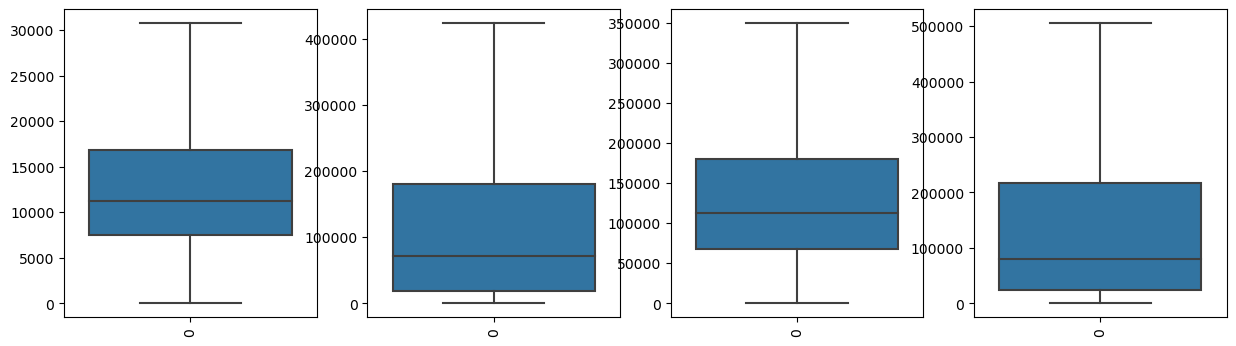

In [165]:
plt.figure(figsize = (15,4))

plt.subplot(1,4,1)
sns.boxplot(previous_application.AMT_ANNUITY)
plt.xticks(rotation = 90)

plt.subplot(1,4,2)
sns.boxplot(previous_application.AMT_APPLICATION)
plt.xticks(rotation = 90)

plt.subplot(1,4,3)
sns.boxplot(previous_application.AMT_GOODS_PRICE)
plt.xticks(rotation = 90)

plt.subplot(1,4,4)
sns.boxplot(previous_application.AMT_CREDIT)
plt.xticks(rotation = 90)
plt.show()

In [166]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.61500,422820.0,504805.5,349762.5,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.73500,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,30739.42125,422820.0,470790.0,349762.5,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,30739.42125,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- Evaluating the nature of data found in categorical columns


In [167]:
previous_application.NAME_CASH_LOAN_PURPOSE.unique()


array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [168]:
previous_application.CODE_REJECT_REASON.unique()


array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [169]:
previous_application.NAME_PORTFOLIO.unique()


array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

In [170]:
previous_application.NAME_PRODUCT_TYPE.unique()


array(['XNA', 'x-sell', 'walk-in'], dtype=object)

In [171]:
previous_application.NAME_CONTRACT_TYPE.unique()


array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [172]:
previous_application.NAME_PAYMENT_TYPE.unique()


array(['Cash through the bank', 'XNA', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [173]:
previous_application.NAME_CLIENT_TYPE.unique()


array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [174]:
previous_application.NAME_GOODS_CATEGORY.unique()


array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [175]:
previous_application.NAME_YIELD_GROUP.unique()


array(['middle', 'low_action', 'high', 'low_normal', 'XNA'], dtype=object)

- All mentioned categorical columns contain incorrect entries such as XNA or XAP. These entries could be replaced with the most frequent value or a new category could be established.

In [176]:
previous_application.NAME_SELLER_INDUSTRY.unique()


array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

In [177]:
previous_application.NAME_CONTRACT_STATUS.unique()


array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [178]:
previous_application.PRODUCT_COMBINATION.unique()


array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', 'Unknown'], dtype=object)

In [179]:
previous_application.CHANNEL_TYPE.unique()


array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

### Analysis of previous application
- The data presently available and data from before both share a column called 'Current ID'. By merging the two datasets using this column, we can potentially discover valuable insights.

In [180]:
merged_data=application_data01.merge(previous_application,on='SK_ID_CURR',how='left',suffixes=('_c','_p'))


In [181]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_c,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_c,AMT_ANNUITY_c,AMT_GOODS_PRICE_c,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_p,AMT_ANNUITY_p,AMT_APPLICATION,AMT_CREDIT_p,AMT_GOODS_PRICE_p,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,<30,Normal,1038818.0,Consumer loans,9251.77500,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High,1810518.0,Cash loans,30739.42125,422820.0,504805.5,349762.5,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High,2636178.0,Consumer loans,30739.42125,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High,2396755.0,Consumer loans,6737.31000,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0,50-60,Very Low,1564014.0,Consumer loans,5357.25000,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


<Axes: xlabel='NAME_CONTRACT_STATUS'>

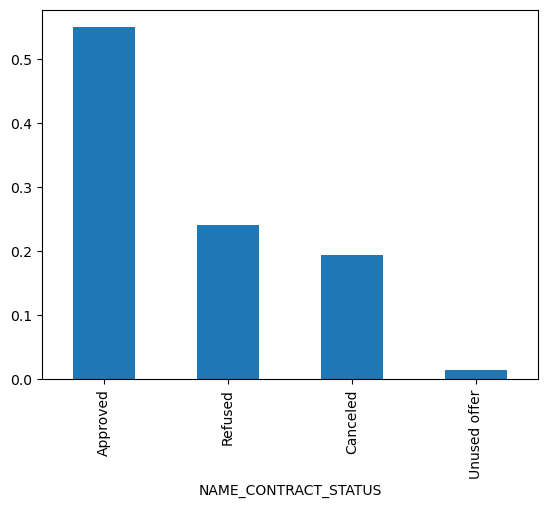

In [182]:
#current defaulters vs previous contract status
merged_data[merged_data.TARGET == 1].NAME_CONTRACT_STATUS.value_counts(normalize= True).plot.bar()

- It is evident that 25% of those who defaulted had their applications denied previously, while nearly 50% were granted approval.

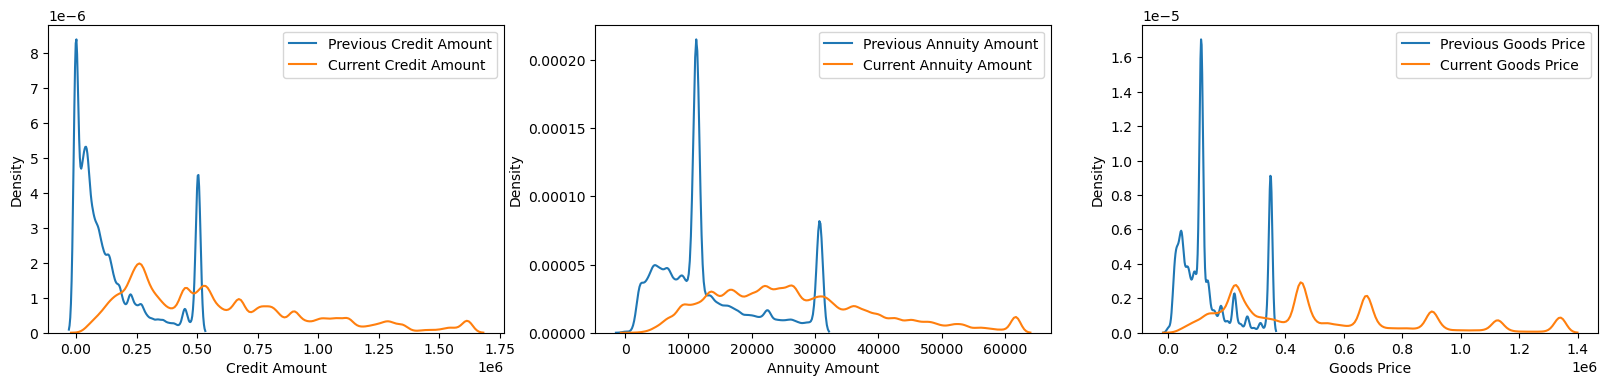

In [183]:
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)

sns.distplot(merged_data.AMT_CREDIT_p, hist = False, label = 'Previous Credit Amount')
sns.distplot(merged_data.AMT_CREDIT_c, hist = False, label = 'Current Credit Amount')
plt.xlabel('Credit Amount')
plt.legend()

plt.subplot(1,3,2)
sns.distplot(merged_data.AMT_ANNUITY_p, hist = False, label = 'Previous Annuity Amount')
sns.distplot(merged_data.AMT_ANNUITY_c, hist = False, label = 'Current Annuity Amount')
plt.xlabel('Annuity Amount')
plt.legend()

plt.subplot(1,3,3)
sns.distplot(merged_data.AMT_GOODS_PRICE_p, hist = False, label = 'Previous Goods Price')
sns.distplot(merged_data.AMT_GOODS_PRICE_c, hist = False, label = 'Current Goods Price')
plt.xlabel('Goods Price')
plt.legend()

plt.show()

- Observations drawn from the graph:

- A comparable pattern can be observed in the pricing chart of past applications, while in new applications, most individuals bought goods with amounts close to 3L, 5L, 7L, specifically in odd figures
- The earlier candidates had a highest credit score of 1L-2L, but a sharp decline was seen in the credit range of 2L-4L followed by an increase at 5L. The present candidates appear to be on a typical trend.


<- All the graphs show that the maximum values of each variable are lower in the previous applications compared to the current applications.